In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from scipy.stats import norm

# data donwloaded from : https://finance.yahoo.com/quote/IBM/history?p=IBM 
# from 01/01/1962 to 11/11/2019


In [2]:
def process(url):
    
    #Read .csv file:
    df=pd.read_csv(url)
    
    #Create new column that contains the daily variance percentage: 
    df['daily_perc']=100*(df.Open-df.Close)/df.Open
    
    #For this new column, get unique value counts: 
    counts=df.daily_perc.value_counts()
    
    #Get max and min date when max and min variance percentage took place 
    max_date=df[['Date']][df.daily_perc == counts.index.max()].values[0][0]
    min_date=df[['Date']][df.daily_perc == counts.index.min()].values[0][0]
    
    #Create text to add to the plot 
    text1='Max value: '+ str(counts.index.max())+ ', Date: '+ str(df[['Date']][df.daily_perc == counts.index.max() ].values[0][0])
    text2='Min value: '+ str(counts.index.min())+ ', Date: '+ str(df[['Date']][df.daily_perc == counts.index.min() ].values[0][0])
    
    #Create histogram, normal distribution fit and a legend
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    
    sns.distplot(df.daily_perc, ax=ax, fit=norm, color='r', bins=100)
    ax.set_xlabel('Daily variance (%)',fontsize=22)
    ax.set_ylabel('frequency',fontsize=20)
    ax.set_title('Daily variance percentage',fontsize=20)
    
    plt.text(7,0.35,text1+'\n\n'+text2,fontsize=16,bbox=dict(facecolor='red', alpha=0.5))
    
    plt.show()
    
    fig.savefig('output.png')
    
    df.to_excel('output.xlsx')
    
    print('Analysis done')

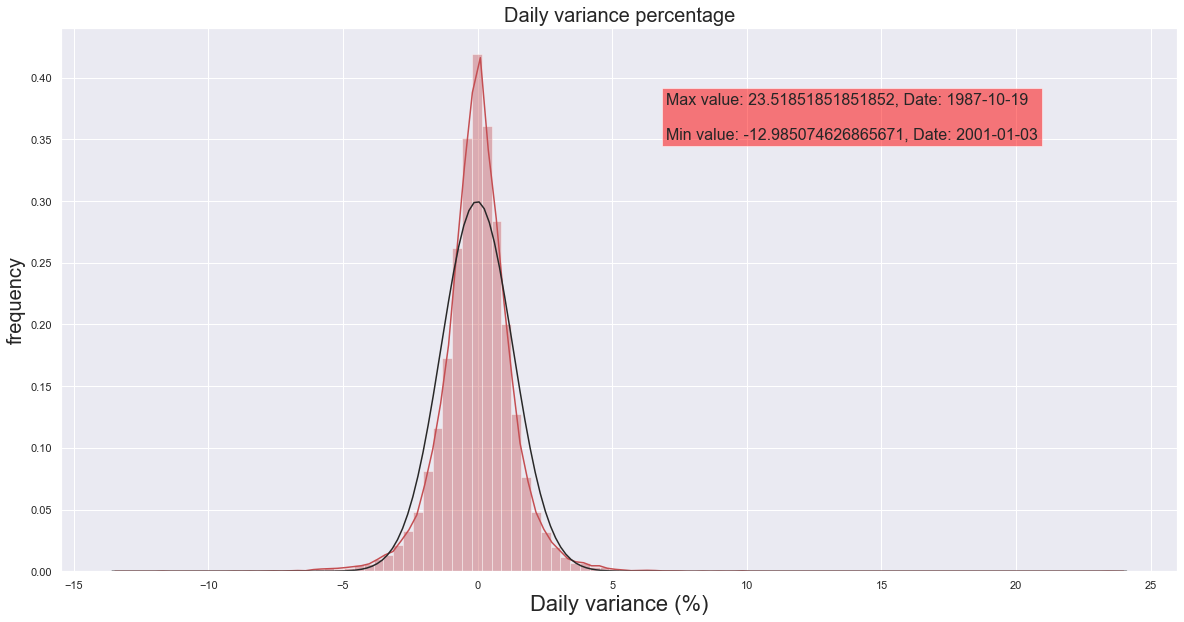

Data saved to output.xlsx


In [4]:
process('IBM.csv')